/tmp/ipykernel_23270/220932289.py:32: RuntimeWarning: invalid value encountered in sqrt
  rad_epicyclic_freq = np.sqrt(1- (6/radiidf) + (8*a /(radiidf**1.5)) - (3 * a ** 2)) / (radiidf ** 2) * keplerian_value / (2* np.pi)
/tmp/ipykernel_23270/220932289.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


TypeError: Length of x (145) must match number of columns in z (384)

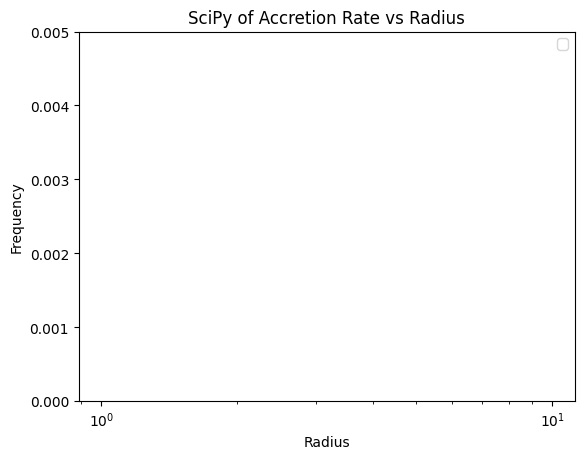

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from scipy.fft import rfftfreq, rfft
import pandas as pd

df = pd.read_csv('/workspaces/Variability-in-Black-Holes/data/Mdot', sep = '\t', header=None, names = ['time', 'radius', 'mdot'])
fft_data = []
fftls_data = []

radiidf = df.radius.unique()
radiidf_new = radiidf[radiidf < 10]

freq = rfftfreq(572, 100)

for radius in df.radius.unique():
  df_new = df.loc[df['radius'] == radius]
  variable_array = np.array(df_new['mdot'])
  power = rfft(variable_array)
  fft_data.append(power)
  frequency, power2 = LombScargle(df_new['time'], variable_array).autopower()
  fftls_data.append(power2)

fft_df = pd.DataFrame(fft_data)
fft_df = fft_df.transpose()
fftls_df = pd.DataFrame(fftls_data)
fftls_df = fftls_df.transpose()

a = .9
keplerian_value = 1/(radiidf**1.5 + a)
keplerian_freq = (keplerian_value/ (2** np.pi))
rad_epicyclic_freq = np.sqrt(1- (6/radiidf) + (8*a /(radiidf**1.5)) - (3 * a ** 2)) / (radiidf ** 2) * keplerian_value / (2* np.pi)
verticl_freq = np.sqrt(keplerian_value ** 2 * (1- (4*a / (radiidf**1.5)) + 3* a * a / (radiidf **2))) / (2* np.pi)


plt.figure()
plt.title('SciPy of Accretion Rate vs Radius')
plt.xlabel('Radius')
plt.ylabel('Frequency')
plt.legend()
plt.ylim(0, 0.005)
plt.xscale('log')
plt.contourf(radiidf_new, freq, np.log(fft_df), cmap='YlGn', extend = 'both', levels = 200)
plt.xscale('log')

plt.colorbar(label = 'Power')
plt.show()

plt.figure()
plt.title('LombScargle of Accretion Rate  vs Radius')
plt.contourf(radiidf_new, frequency, np.log(fftls_df), cmap='YlGn', extend = 'both', levels = 200)
plt.legend()
plt.ylim(0, 0.005)
plt.xscale('log')
plt.colorbar(label = 'Power')
plt.xlabel('Radius')
plt.ylabel('Frequency')
plt.show()